In [1]:
import numpy as np
import matplotlib.pyplot as plt

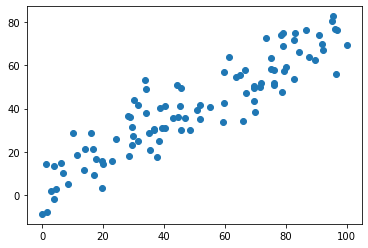

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
from fun_machine_learning.PCA import PCA
pca = PCA(n_components=2)

In [6]:
pca.fit(X)
pca.components_

array([[ 0.80060195,  0.59919656],
       [ 0.59920104, -0.8005986 ]])

In [7]:
pca = PCA(n_components=1)
pca.fit(X)
pca.components_

array([[0.80060192, 0.5991966 ]])

In [9]:
# X is reduce to 1 features
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

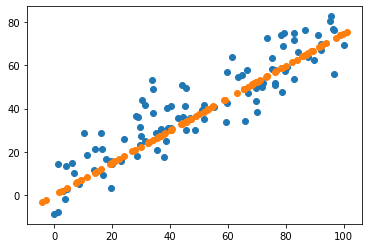

In [12]:
# It's obvious that the restored X has lost many data (majority of which may be noise)
X_restore = pca.inverse_tranform(X_reduction)
plt.scatter(X[:,0], X[:,1])
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

## Use PCA in scikit-learn

In [13]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=1)
pca.fit(X)
pca.components_

array([[-0.80060201, -0.59919648]])

In [17]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [20]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 600)
X_train.shape

(1437, 64)

In [24]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 3.59 ms, sys: 552 µs, total: 4.14 ms
Wall time: 3.65 ms


KNeighborsClassifier()

In [25]:
knn_clf.score(X_test, y_test)

0.9888888888888889

In [41]:
pca2 = PCA(n_components=2)
pca2.fit(X_train)
X_train_reduction = pca2.transform(X_train)
X_test_reduction = pca2.transform(X_test)

In [42]:
%%time
knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(X_train_reduction, y_train)

CPU times: user 1.14 ms, sys: 435 µs, total: 1.58 ms
Wall time: 1.17 ms


KNeighborsClassifier()

In [43]:
knn_clf2.score(X_test_reduction, y_test)

0.6138888888888889

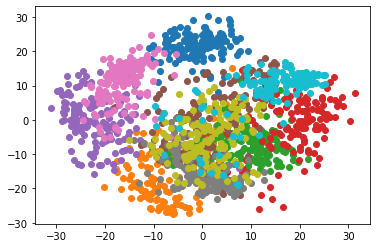

In [45]:
# Although reduce features to 2 yield low score, it's easier to visualize
# It can be seen that many sample has obvious boundries even in 2 dimensions
for i in range(10):
    plt.scatter(X_train_reduction[y_train==i,0], X_train_reduction[y_train==i,1])
plt.show()

### Which value should we use for n_components to get a higher score, following is a graph showing the relaltionship between n_components and variance ratio

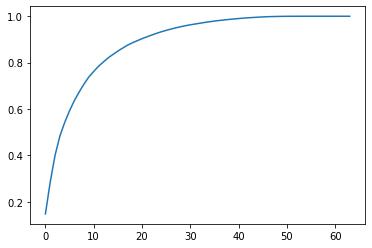

In [32]:
pca_tmp = PCA(n_components=X_train.shape[1])
pca_tmp.fit(X_train)
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca_tmp.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [37]:
# Set the percentage of variance explained by each of the selected components
pca3 = PCA(0.95)
pca3.fit(X_train)
pca3.n_components_

28

In [38]:
X_train_reduction = pca3.transform(X_train)
X_test_reduction = pca3.transform(X_test)

In [39]:
%%time
knn_clf3 = KNeighborsClassifier()
knn_clf3.fit(X_train_reduction, y_train)

CPU times: user 2.4 ms, sys: 1.12 ms, total: 3.52 ms
Wall time: 2.45 ms


KNeighborsClassifier()

In [40]:
knn_clf3.score(X_test_reduction, y_test)

0.9888888888888889

## Use MINST dataset

In [48]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [49]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [50]:
X, y = mnist['data'], mnist['target']

In [51]:
X.shape, y.shape

((70000, 784), (70000,))

In [52]:
# The MINST dataset is already splited, no need to run train_test_split
X_train = np.array(X[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_train = np.array(y[:60000], dtype=float)
y_test = np.array(y[60000:], dtype=float)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train, y_train)

CPU times: user 14.7 s, sys: 169 ms, total: 14.9 s
Wall time: 15 s


KNeighborsClassifier()

In [54]:
%time knn_clf.score(X_test, y_test)

CPU times: user 11min 36s, sys: 1.84 s, total: 11min 38s
Wall time: 11min 41s


0.9688

In [55]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [56]:
X_train_reduction.shape

(60000, 87)

In [57]:
knn_clf = KNeighborsClassifier()
%time knn_clf.fit(X_train_reduction, y_train)

CPU times: user 398 ms, sys: 3.5 ms, total: 401 ms
Wall time: 401 ms


KNeighborsClassifier()

### Why on earth after reduction, the accuracy score increse?
Because PCA not only reduce features, it also reduce noise

In [58]:
%time knn_clf.score(X_test_reduction, y_test)

CPU times: user 1min 8s, sys: 227 ms, total: 1min 8s
Wall time: 1min 8s


0.9728

In [59]:
pca.transform?

## Noise reduction on hand-written digits

In [71]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [72]:
# Fetch 100 samples to test
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

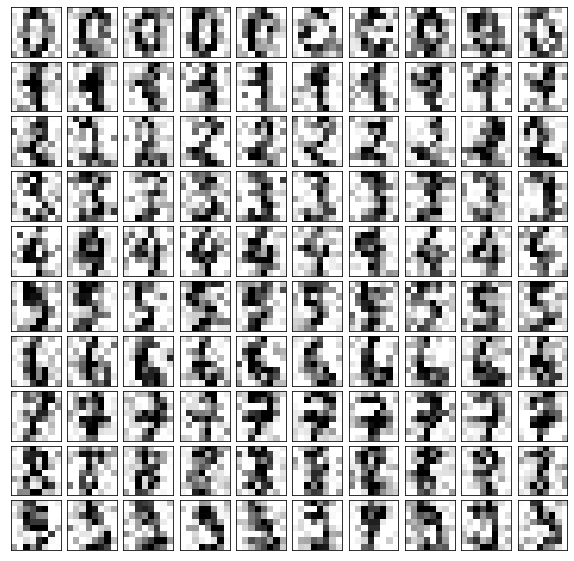

In [73]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [76]:
# Based on visual observation, there is much noise, thus I choose 0.5 as the the percentage of variance explained
pca = PCA(0.5)
pca.fit(noisy_digits)
pca.n_components_

12

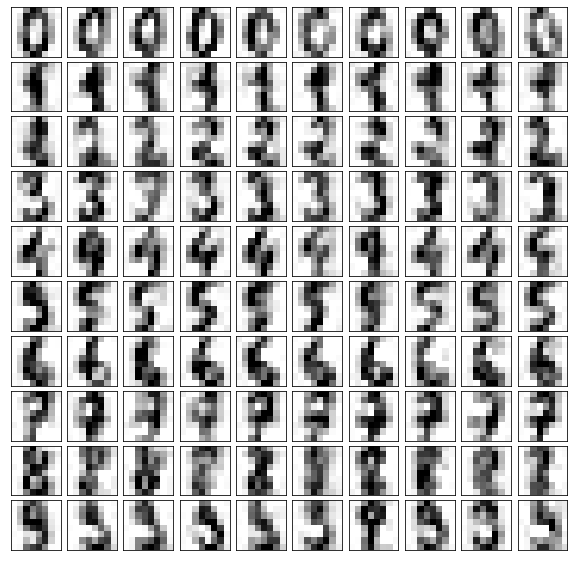

In [78]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

In [81]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()

In [82]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [83]:
faces.data.shape

(13233, 2914)

In [85]:
random_indexes = np.random.permutation(len(faces.data))
X = faces.data[random_indexes]
# Fetch 36 samples to test
example_faces = X[:36,:]
example_faces.shape

(36, 2914)

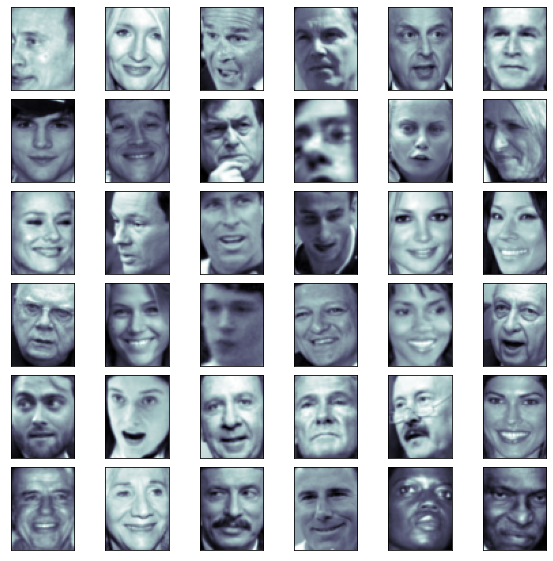

In [86]:
def plot_faces(faces):
    
    fig, axes = plt.subplots(6, 6, figsize=(10, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()
    
plot_faces(example_faces)

In [87]:
%%time
pca = PCA(svd_solver='randomized')
pca.fit(X)

CPU times: user 1min 19s, sys: 2.58 s, total: 1min 22s
Wall time: 15.5 s


PCA(svd_solver='randomized')

In [88]:
pca.components_.shape

(2914, 2914)

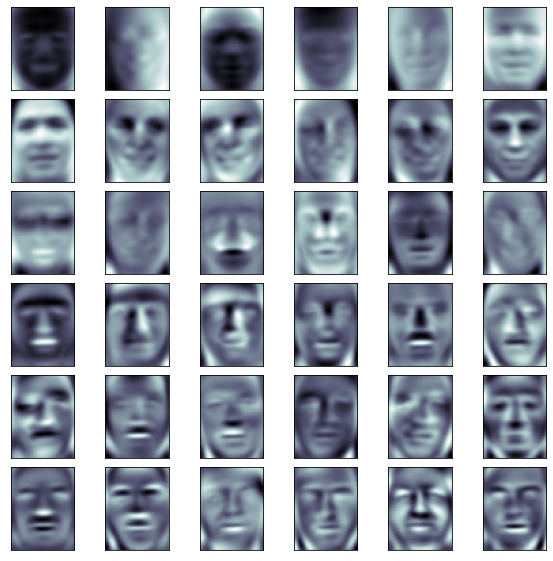

In [89]:
plot_faces(pca.components_[:36,:])